# Assignment #1 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino<br>
Spring 2025

Name:Melissa Laurino
<br>
Date: 1/20/25

<b>Data. Is. Everywhere.</b> <br>
Our first objective is to locate and explore <b>TWO</b> datasets about something you are passionate about, or related to a field you would like to work in. Our semester plan is <i>try</i> to work with the same dataset through out the semester. You can find and explore as many datasets as you wish, but Assignment #2 will focus on the one you like the best.
There are many great websites that offer public datasets avaialable to download. Examples include but are not limited to:
<br>
Data.gov - https://data.gov/ - has many government owened public datasets.<br>
World Bank Data - https://data.worldbank.org/ - has world economic, social, and environmental data.<br>
Google Dataset Search - https://datasetsearch.research.google.com/ - many of these available datasets link to published studies available on Google Scholar in many fields.<br>
Kaggle Datasets - https://www.kaggle.com/datasets - a platform for sharing datasets. Anyone can upload to this website.<br>
U.S. Census Bureau - https://www.census.gov/ - data on people, places and econoy for the United States.
GitHub - https://github.com/ - hosts datasets and completed projects.<br>
Federal Reserve Economic Data (FRED) - https://fred.stlouisfed.org/ - Financial and economic data.<br>
CDC - https://data.cdc.gov/ - Explore the various data collected by the CDC.<br>
NOAA - https://www.ncei.noaa.gov/cdo-web/ - NOAA climate and ocean data. <br>
<br>
In addition to these resources, occasionally local organizations may be able to provide you with data, or maybe even your own company! Your data source can come from a personal connection, but please be mindful of any data agreements or approvals you may need. If you need approval to use data from your place of employment, please specify that with the instructor so we can ensure no violations to your data agreement will be made this semester.
<br>
<br>
Resources for learning Python:
- Data camp - https://www.datacamp.com/category/python - Contact Professor Baldwin for access.<br>
- Data Science from Scratch: First Principles with Python - Check Blackboard <br>
- Python for Data Analysis Data Wrangling with pandas, NumPy & Jupyter - Check Blackboard

For Assignment #1, our objective is to locate and explore two different datasets using Python. We will choose one of these datasets to clean to prepare for our future database. For each dataset include: <br>
- The dataset name, company/organization resonsible for data collection, the download link, and date of access. <br>
- Load neccessary packages <br>
- Obtain the general info for your data such as size, number of rows/columns, column names, describing the data etc. <br>
- Create one quick plot to visualize your data. It is okay if it is messy since your data has not been cleaned yet, but still make sure you are practicing good graphins with a title, axis labels, and anything else needed for your graph.  <br>

Comment ALL code to recieve full credit. The above bullet points are to help guide you in your process, but extensive exploration is expected for each data set. <br>
<br>
Explore various markdown font settings: https://ingeh.medium.com/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed

# Dataset

<b>Dataset name: CMWWRC</b><br>
<b>Company/Government Organization: Cape May Whale Watch and Research Center/Cape May Marine Mammal Research Center 501c3</b><br>
Download link: www.capemaywhalewatch.com <br>
Date of Access: 1/20/2025

Popular packages to load in working with Python: <br>
pandas: https://pandas.pydata.org/about/index.html <br>
numpy: https://numpy.org/learn/ <br>
matplotlib: https://matplotlib.org/stable/api/pyplot_summary.html

In [65]:
# My examples are below, but edit as needed to fit your dataset:
import pandas as pd # Reads, writes, shapes, manipulates data
import numpy as np # Basic stats and numerical operations
import matplotlib.pyplot as plt # Creating basic graphs
import seaborn as sns # Extra data visualizations

Importing a library as an abbreviation is beneficial to shorten your code and make it more concise. <br>
For example, when referencing your data frame without the abbreviation you would write: pandas.DataFrame <br>
With an abbreviation, you can just write: pd.DataFrame

Load your chosen dataset into the notebook below:

In [45]:
# Be sure to document each line of code like the above example.
# Documenting each line of code is helpful when revisiting assignments later in the semester.

In [18]:
# Load the locally stored CSV file
# My locally stored file is in the same location as this document. Therefore, I do not need to specify a different working directory.
df = pd.read_csv("2011_2024_Master_Laurino_01_20_25.csv") # Create a data frame using pandas.read_csv

/var/folders/_9/x6f1rdhs15d70lkp6829tnw80000gn/T/ipykernel_23264/1612986247.py:3: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,23,24,25,27,28,29,30,31,33,34,35,36,38,39,42,43,44,46,16383) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2011_2024_Master_Laurino_01_20_25.csv") # Create a data frame using pandas.read_csv


My data just took a while to load into Jupyter notebook. We can run df.info() to see how large the dataframe is:

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12322 entries, 0 to 12321
Columns: 16384 entries, Date to Unnamed: 16383
dtypes: float64(16338), object(46)
memory usage: 1.5+ GB


df.info() is telling me that I have 16,384 columns in my dataset. Since I know this data pretty well, I know it should only have ~46-48 columns. This can happen with .csv data that is converted from Excel files that use Data Validation techniques for rows and columns.

In [22]:
# Check columns with all missing values
blank_columns = df.columns[df.isnull().all()]
print(blank_columns)

Index(['Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56',
       ...
       'Unnamed: 16373', 'Unnamed: 16374', 'Unnamed: 16375', 'Unnamed: 16376',
       'Unnamed: 16377', 'Unnamed: 16378', 'Unnamed: 16379', 'Unnamed: 16380',
       'Unnamed: 16381', 'Unnamed: 16382'],
      dtype='object', length=16336)


The length=16,336 tells me there are that many completely BLANK columns in this .csv file. That leaves 48 non-blank columns, which sounds about right. Let's delete the columns that are blank:

In [31]:
# Drop blank columns if needed
df = df.drop(columns=blank_columns)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12322 entries, 0 to 12321
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     12320 non-null  object 
 1   Trip                     12241 non-null  object 
 2   Trip Start Time          12224 non-null  object 
 3   Trip End Time            12209 non-null  object 
 4   Vessel                   12266 non-null  object 
 5   Captain                  11681 non-null  object 
 6   Naturalist               11556 non-null  object 
 7   Data Collector           11665 non-null  object 
 8   Data Entered in By       11663 non-null  object 
 9   Photographer             10416 non-null  object 
 10  Whale SENSE Mentioned?   11658 non-null  object 
 11  Atmosphere               11610 non-null  object 
 12  Precipitation            11643 non-null  object 
 13  Visibility               11603 non-null  object 
 14  Wind Speed            

Great! This is much more manageable and uses a lot less memory. From looking at the output above, we can see: <br>
--We have 46 columns of data (Remember that python starts the numbering system AT 0.) <br>
--Columns 47 & 48 only have 1 or 4 entries out of 12k rows. Since this is such a small number, we can leave them for now. Some of this data is manually entered in Excel and these outliers may need to be investigated individually.

In [101]:
# Since I would like to save my check point and not do this step every time, I will save the "cleaned" new data as a separate .csv file:
df.to_csv("Cleaned_2011_2024_Master_Laurino_01_20_25.csv", index=False) 
# index=False does not add a column to number the rows of data

In [207]:
df = pd.read_csv("Cleaned_2011_2024_Master_Laurino_01_20_25.csv")

# Convert my date column to dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Subset data for rows where the Date is 2024
df_2024 = df[df['Date'].dt.year == 2024]

What are the unique columns or variables present in your dataset? How many rows are there?

In [179]:
# What are the unique column names?
unique_columns = df_2024.columns # Create a new variable of column names from our data frame
print("Column Names:") # Print the title:
print(unique_columns) # Print the names

# Find and print the total number of columns
print("\nNumber of Columns:", len(unique_columns))

# Find and print the total number of rows
print("\nNumber of Rows:", len(df_2024))

Column Names:
Index(['Date', 'Trip', 'Trip Start Time', 'Trip End Time', 'Vessel', 'Captain',
       'Naturalist', 'Data Collector', 'Data Entered in By', 'Photographer',
       'Whale SENSE Mentioned?', 'Atmosphere', 'Precipitation', 'Visibility',
       'Wind Speed', 'Sea Height', 'Swell Height', 'Wind Direction',
       'Swell Direction', 'Cloud Cover', 'General Area', 'Sighting No.',
       'Species', 'Min', 'Max', 'Catologued Animals', 'Time Start', 'Time End',
       'Latitude start', 'Latitude end', 'Longitude start', 'Longitude end',
       'Water Temperature', 'Depth', 'Original Tide Recording', 'Tide Value',
       'Tide Stage', 'Behavior General', 'Feeding', 'Mating', 'Photos',
       'With Calf?', 'With Juvenile?', 'Direction Traveling',
       'With or Against Tide', 'Notes', 'Unnamed: 46', 'Unnamed: 16383'],
      dtype='object')

Number of Columns: 48

Number of Rows: 1165


Use print(" ") statements in python to print text or variables in the output. <br>
Use \n in the print statement to skip a line. Without skipping a line, everything prints close together.

In [182]:
# Describe the numerical columns
print(df_2024.describe())

       Cloud Cover  Water Temperature
count  1145.000000        1126.000000
mean      4.893450          63.606989
std       2.668615           7.832280
min       0.000000          16.400000
25%       3.000000          60.260000
50%       4.000000          64.360000
75%       7.000000          69.347500
max      10.000000          79.270000


In [184]:
# Look more closely at the data types
print(df_2024.dtypes)

Date                       datetime64[ns]
Trip                               object
Trip Start Time                    object
Trip End Time                      object
Vessel                             object
Captain                            object
Naturalist                         object
Data Collector                     object
Data Entered in By                 object
Photographer                       object
Whale SENSE Mentioned?             object
Atmosphere                         object
Precipitation                      object
Visibility                         object
Wind Speed                         object
Sea Height                         object
Swell Height                       object
Wind Direction                     object
Swell Direction                    object
Cloud Cover                       float64
General Area                       object
Sighting No.                       object
Species                            object
Min                               

A lot of the columns that may appear to be numerical are showing up as objects. This is because some of the columns have mixed integers and characters.

In [209]:
# Explore the values of a category column:
print(df_2024['Tide Stage'].value_counts())

print(df_2024['With Calf?'].value_counts())

Ebbing      539
Flooding    509
Name: Tide Stage, dtype: int64
No                       694
Passing                  151
Yes, 1                   137
Yes, 2                    61
Yes, 3                    11
Yes, 4                     9
passing                    3
passing                    2
Other, please specify      1
Yes, 6                     1
PASSING                    1
Name: With Calf?, dtype: int64


Create one graph to quickly visualize your data using matplotlib. <br>
Matplotlib color guide: https://i.sstatic.net/lFZum.png <br><br>
It's okay if it is not visualy appealing or contains outliers, because we have not cleaned our data yet! Did you get any errors? If so, what were they? Would the errors have been avoided if you had cleaned the data first?<br>
Data cleaning and transforming is very important when storing your data in a warehouse...ready for Assignment #2?

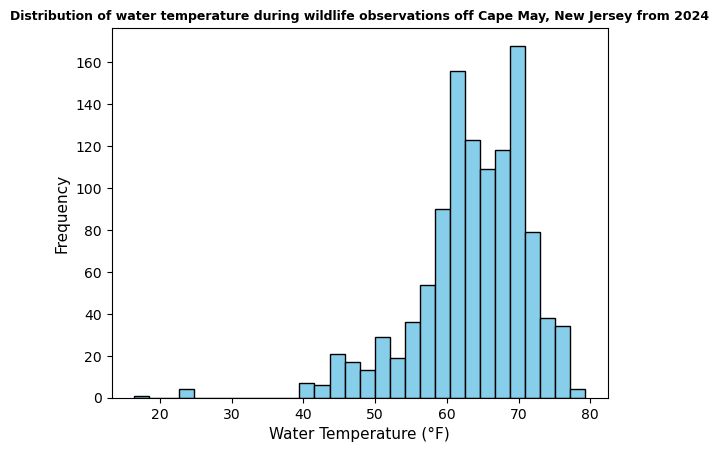

In [163]:
# Create a new data frame of just the water temperature column for a quick plot
wt = df_2024['Water Temperature']

# Quick plot of a histogram using matplotlib
plt.hist(wt, bins=30, color='skyblue', edgecolor='black')

# Adding a title and axis labels
plt.title("Distribution of water temperature during wildlife observations off Cape May, New Jersey from 2024", fontsize=9, fontweight='bold')
plt.xlabel("Water Temperature (°F)", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

# Display the plot
plt.show()

Already by looking at our quick visualization, we can see an outlier or two. Was the water temperature in the ocean ever below 30 degrees off New Jersey? Most likely not. Time to clean the data!

# Assignment #2 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2025</br>

Our next objective is to choose <b>ONE</b> of the datasets from our previous assignment to explore further. The datasets we have chose for Assignment #1 can be cleaned by practicing our Python skills. Depending on your data, and especially the size of it, it may be more beneficial to clean in a language you are comfortable working in already instead of cleaning our data with a new language like SQL. SQL may be needed for cleaning of databases that are very large or hundreds of terabytes in size. We will clean our datasets first before we attempt to load them into our SQL databases. </br>
Not only is data everywhere, but it can also be messy. Messy data can originate in the data collection process, whether this is occurring with manual data entry and typos, or with outdated collection forms that hold multiple variables that mean the same thing. For example, while collecting data on marine mammals, it is important to note who the observer is. With Python and R, reading excel or csv files, these languages will take the same variable written as, "Melissa Laurino" and "melissa laurino" as two separate observers because they are case sensitive. However, this is not accurate because they are meant to be the same person within the observer column or category.</br>
Clean data is important for consistency that leads to accurate results and analysis. If we are using our data to make informed decisions in our field, we need it to be clean. We do not want to omit rows that may make a difference to our dataset because they do not fit a certain criteria due to typos, but how much should the original dataset be altered? Depending on your field, there may be regulations and compliance standards regarding data quality. Protocols may state if the data does not read exactly how it should be, then it should be ommitted. </br>
For our learning objectives in this class, we will clean our data. Our first assignment in our warehousing journey was important because it allowed us to gain a better understanding of a dataset that we personally did not collect. Now that we have that understanding, we can explore it in greater depth and clean it as necessary.<br>
<br>
For Assignment #2, our objective is to clean one of the datasets explored above using Python to prepare for our future database from scratch. Include at a minimum:

- The chosen dataset name, company/organization resonsible for data collection, the download link, and date of access.
- Load neccessary packages and data (Only if you start a new session in Jupyter, not if you are continuing from above).
- Make all column names lower case, contain no spaces, and no special characters (SQL will not like this otherwise).
- *Make detailed comments with your code* <br>
- *Record EVERYTHING ommitted and changed if necessary* <br>
- Since we are exploring and learning without a specific organization policy, use your best judgement when ommitting records. If you have chosen to ommit data, please explain why.</br>
- Save your new CLEAN data as a .csv file. 

Comment ALL code to recieve full credit. The above bullet points are to help guide you in your process, but extensive cleaning is expected for your data set (This will also save you a lot of time down the line!). 
<br>

<br>
<b>The code that I have written below is just to give you ideas on exploring and cleaning data. It is encouraged that you explore and clean it in greater detail than what I have written below for full credit.</b><br>

Make all column names lowercase, with no spaces or special characters:

In [217]:
# We have spaces and capital letters in our column names, even special characters! 
# SQL will not like this eventually. 
# Let's make all column names lowercase and delete the space and special characters

# Make column names lowercase
df_2024.columns = df_2024.columns.str.lower().str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_")
# regex=True, a regular expression
# Regular expression definitions: https://developers.google.com/edu/python/regular-expressions
# str.replace(" ", "_") Replace a space with an underscore

# Display the new column names for the 2024 subset
df_2024.columns

Index(['date', 'trip', 'trip_start_time', 'trip_end_time', 'vessel', 'captain',
       'naturalist', 'data_collector', 'data_entered_in_by', 'photographer',
       'whale_sense_mentioned', 'atmosphere', 'precipitation', 'visibility',
       'wind_speed', 'sea_height', 'swell_height', 'wind_direction',
       'swell_direction', 'cloud_cover', 'general_area', 'sighting_no',
       'species', 'min', 'max', 'catologued_animals', 'time_start', 'time_end',
       'latitude_start', 'latitude_end', 'longitude_start', 'longitude_end',
       'water_temperature', 'depth', 'original_tide_recording', 'tide_value',
       'tide_stage', 'behavior_general', 'feeding', 'mating', 'photos',
       'with_calf', 'with_juvenile', 'direction_traveling',
       'with_or_against_tide', 'notes', 'unnamed_46', 'unnamed_16383'],
      dtype='object')

In [219]:
# Our Water Temperature column is being read as a string, but we want it to be numeric, or a float:
df_2024['water_temperature'] = df_2024['water_temperature'].astype(float)

/var/folders/_9/x6f1rdhs15d70lkp6829tnw80000gn/T/ipykernel_23264/939984085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['water_temperature'] = df_2024['water_temperature'].astype(float)


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”


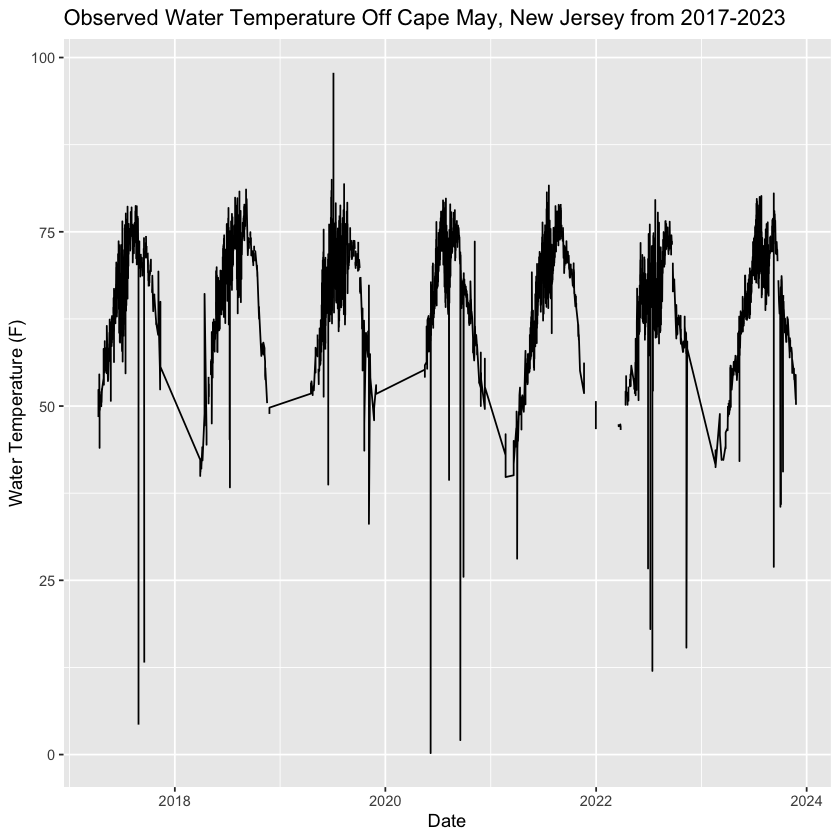

In [69]:
#Now our plot looks more realistic, but look at those outliers!
ggplot(data, aes(x = data$date, y = data$water.temperature)) +
  geom_line() +
  labs(title = "Observed Water Temperature Off Cape May, New Jersey from 2017-2023",
       x = "Date",
       y = "Water Temperature (F)")

In [70]:
#Since I happen to know this data, I have a few options:
###Find the dates the outliers occurred, compare them with original data sheet, fix the typo. 
###From a quick glance it looks like the water dips below 30 degrees 7 times. I know this is incorrect.
###So should I go back and fix each typo or just ommit the sighting? For my case, I would NOT ommit.
#If I were to ommit this data, it would yield inaccurrate results. (Observational data by species, behavior, etc.) 

#To ommit the data:
#data <- data[!(data$water.temperature > 85 | data$water.temperature < 30), ]

# Dataset #2

<b>Dataset name: A "Lifetime" of Spotify Streaming History - Melissa Laurino</b><br>
<b>Company: Spotify</b><br>
Download link: https://support.spotify.com/uk/article/understanding-my-data/<br>
Date of Access: 12/31/2024

In [10]:
# Change working directory to explore Spotify data
import os
os.chdir('/Users/melissa/Documents/DSSA/DGW/Python_Spring2025/Spotify Extended Streaming History/')

In [69]:
# Load the .csv Spotify data that was previously cleaned in R:
spotify = pd.read_csv("spotify_subset_2012_2024.csv")

/var/folders/_9/x6f1rdhs15d70lkp6829tnw80000gn/T/ipykernel_24404/3329166261.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify = pd.read_csv("spotify_subset_2012_2024.csv")


In [18]:
# Get general info of the dataset such as the number of columns, rows, and size of the data.
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203043 entries, 0 to 203042
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ts                                 203043 non-null  object 
 1   platform                           203043 non-null  object 
 2   ms_played                          203043 non-null  int64  
 3   conn_country                       203043 non-null  object 
 4   ip_addr                            203043 non-null  object 
 5   master_metadata_track_name         203043 non-null  object 
 6   master_metadata_album_artist_name  203043 non-null  object 
 7   master_metadata_album_album_name   203043 non-null  object 
 8   spotify_track_uri                  203043 non-null  object 
 9   episode_name                       0 non-null       float64
 10  episode_show_name                  0 non-null       float64
 11  spotify_episode_uri                0 no

The Spotify data has 203,043 rows, 24 columns, and larger in size >33MB

If you type the name of the dataframe, followed by a period, and click TAB, you will see multiple options to autocomplete including the following three:

In [21]:
# Check the first five rows of the data frame
spotify.head()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
0,2012-08-03 15:43:50,OS X 10.7.4 [x86 4],137760,US,134.210.225.27,Some Nights - Intro,fun.,Some Nights,spotify:track:1JAI5Ia020mdGH2wMQEacy,NaN,...,NaN,NaN,uriopen,trackdone,False,False,False,NaN,False,2012
1,2012-08-03 15:48:28,OS X 10.7.4 [x86 4],277040,US,134.210.225.27,Some Nights,fun.,Some Nights,spotify:track:6t6oULCRS6hnI7rm0h5gwl,NaN,...,NaN,NaN,trackdone,trackdone,False,False,False,NaN,False,2012
2,2012-08-03 15:50:16,OS X 10.7.4 [x86 4],108244,US,134.210.225.27,We Are Young (feat. Janelle Monáe),fun.,Some Nights,spotify:track:7a86XRg84qjasly9f6bPSD,NaN,...,NaN,NaN,trackdone,uriopen,False,True,False,NaN,False,2012
3,2012-08-03 15:50:31,OS X 10.7.4 [x86 4],16015,US,134.210.225.27,Trip to Your Heart,Britney Spears,Femme Fatale (Deluxe Version),spotify:track:2qbhijQG7phGVHkPt22fTP,NaN,...,NaN,NaN,uriopen,uriopen,False,True,False,NaN,False,2012
4,2012-08-03 15:53:53,OS X 10.7.4 [x86 4],73786,US,134.210.225.27,Stan,Eminem,The Marshall Mathers LP,spotify:track:3UmaczJpikHgJFyBTAJVoz,NaN,...,NaN,NaN,uriopen,popup,False,True,False,NaN,False,2012


In [25]:
# Check the last five rows of the data frame
spotify.tail()

,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode,year
203038,2024-07-26 11:29:30,ios,2559,US,134.210.222.137,"Red - From ""Descendants: The Rise of Red""",Kylie Cantrall,Red,spotify:track:1AP7xueWwO5AakWFYzttpV,NaN,...,NaN,NaN,unknown,endplay,False,True,NaN,NaN,False,2024
203039,2024-07-26 11:29:31,ios,1062,US,134.210.222.137,Life Is Sweeter,Descendants – Cast,Descendants: The Rise of Red,spotify:track:46CznmGbHRvRhTkvaN5rDB,NaN,...,NaN,NaN,unknown,endplay,False,True,NaN,NaN,False,2024
203040,2024-07-26 11:29:39,ios,755,US,134.210.222.137,Space Between,Dove Cameron,Descendants 2,spotify:track:3N1V03yrqyNPo5A4Fu2Wd7,NaN,...,NaN,NaN,unknown,endplay,False,True,NaN,NaN,False,2024
203041,2024-07-26 11:29:41,ios,0,US,134.210.222.137,Perfect Revenge,Dara Reneé,Descendants: The Rise of Red,spotify:track:60UNcOiHERCGTo9qsssH2K,NaN,...,NaN,NaN,unknown,endplay,False,True,NaN,NaN,False,2024
203042,2024-07-26 11:29:50,ios,2195,US,134.210.222.137,Back to Autumn,Tall Heights,"Holding On, Holding Out",spotify:track:3TdZbELsPLWYZAArGSfwyQ,NaN,...,NaN,NaN,unknown,endplay,False,True,NaN,NaN,False,2024


In [36]:
# Check the columns of the data frame
spotify.columns

Index(['ts', 'platform', 'ms_played', 'conn_country', 'ip_addr',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
       'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title',
       'reason_start', 'reason_end', 'shuffle', 'skipped', 'offline',
       'offline_timestamp', 'incognito_mode', 'year'],
      dtype='object')

In [33]:
# Describe the numerical data, if there is any:
spotify.describe()

,ms_played,episode_name,episode_show_name,spotify_episode_uri,audiobook_title,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,offline_timestamp,year
count,2.030430e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.040500e+04,203043.000000
mean,9.844050e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.082585e+09,2019.749363
std,1.107233e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.010127e+11,2.826200
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.665829e+09,2012.000000
25%,1.973000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677948e+09,2018.000000
50%,3.916800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.699616e+09,2020.000000
75%,1.953725e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.716547e+09,2022.000000
max,3.570734e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.658321e+12,2024.000000


In [38]:
# Check the data types of the columns
spotify.dtypes

ts                                    object
platform                              object
ms_played                              int64
conn_country                          object
ip_addr                               object
master_metadata_track_name            object
master_metadata_album_artist_name     object
master_metadata_album_album_name      object
spotify_track_uri                     object
episode_name                         float64
episode_show_name                    float64
spotify_episode_uri                  float64
audiobook_title                      float64
audiobook_uri                        float64
audiobook_chapter_uri                float64
audiobook_chapter_title              float64
reason_start                          object
reason_end                            object
shuffle                                 bool
skipped                                 bool
offline                               object
offline_timestamp                    float64
incognito_

My data types in the Spotify data are: <br>
object - May be text, or text and numbers<br>
int64 - Integers <br>
float64 - A floating decimal number <br>
bool - True/False <br>

My data is "cleaned" for the most part since I had prepared it to use in R last semester. I can convert the ts (Date/time) column to read in as a date and the miliseconds to minutes:

In [71]:
# Convert 'ts' to datetime format
spotify['ts'] = pd.to_datetime(spotify['ts'])

# Convert 'ms_played' to minutes
spotify['minutes_played'] = spotify['ms_played'] / (1000 * 60)  # Convert milliseconds to minutes by multiplying by 60.

# Check the new data type for ts column
spotify.ts

0        2012-08-03 15:43:50
1        2012-08-03 15:48:28
2        2012-08-03 15:50:16
3        2012-08-03 15:50:31
4        2012-08-03 15:53:53
                 ...        
202673   2024-07-26 11:29:30
202674   2024-07-26 11:29:31
202675   2024-07-26 11:29:39
202676   2024-07-26 11:29:41
202677   2024-07-26 11:29:50
Name: ts, Length: 202678, dtype: datetime64[ns]

### My Streaming History 2012-2024 - Top 30 Songs 

/var/folders/_9/x6f1rdhs15d70lkp6829tnw80000gn/T/ipykernel_24404/1438233808.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_songs.values, y=top_songs.index, palette="viridis")


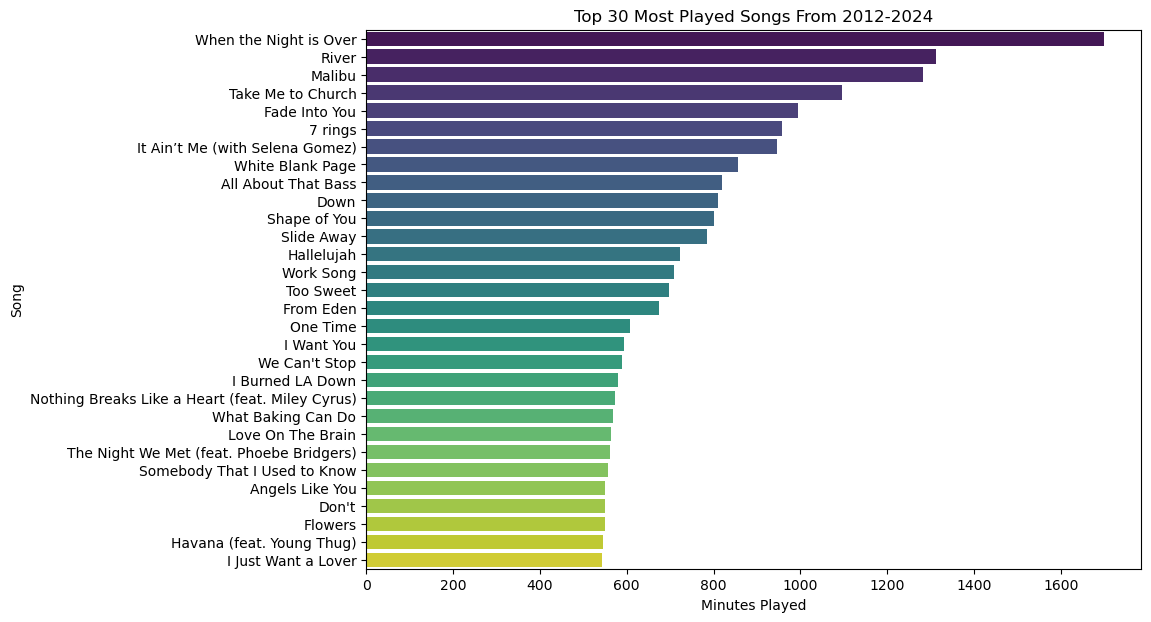

In [91]:
# Use pandas.groupby() function to specify grouping by the track name and minutes played, sum them, and take the largest 30
top_songs = spotify.groupby('master_metadata_track_name')['minutes_played'].sum().nlargest(30)

# Change the size of the figure
plt.figure(figsize=(10, 7))

# Create a graph from seaborn, specify x and y variables, and bar colors
sns.barplot(x=top_songs.values, y=top_songs.index, palette="viridis")
# Existing seaborn color palettes: https://www.skeletoncodemachine.com/p/exploring-color-palettes

# All graphs need all labels :
plt.xlabel("Minutes Played")
plt.ylabel("Song")
plt.title("Top 30 Most Played Songs From 2012-2024")

# Print the graph
plt.show()

### My Streaming History 2012-2024 - Top 30 Artists 

/var/folders/_9/x6f1rdhs15d70lkp6829tnw80000gn/T/ipykernel_24404/2551452965.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")


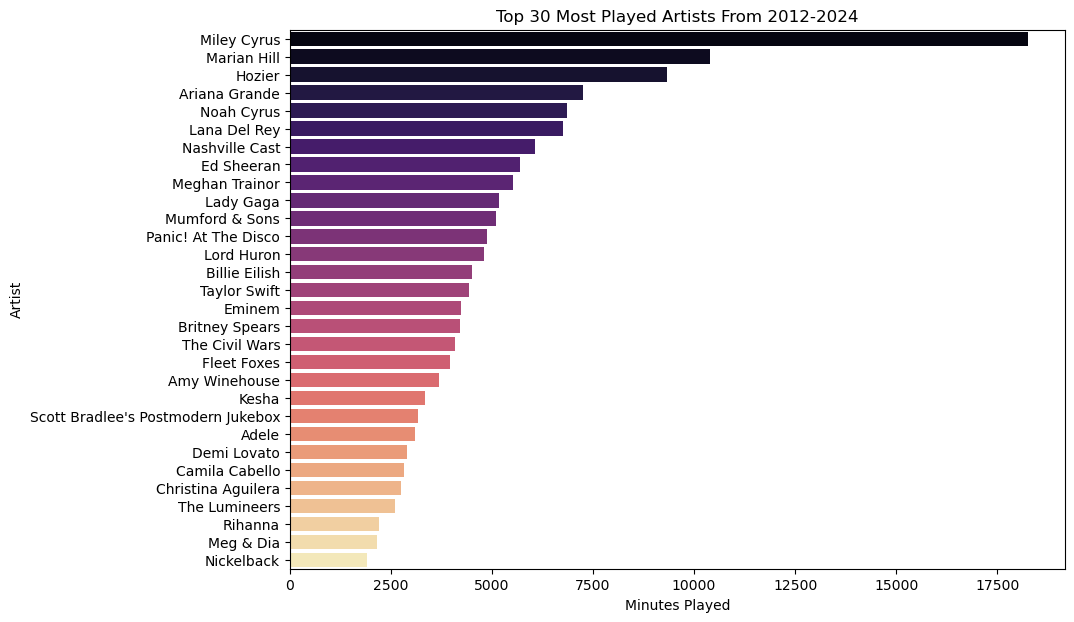

In [89]:
# Use pandas.groupby() function to specify grouping by the artist name and minutes played, sum them, and take the largest 30
top_artists = spotify.groupby('master_metadata_album_artist_name')['minutes_played'].sum().nlargest(30)

# Change the size of the figure
plt.figure(figsize=(10, 7))

# Create a graph from seaborn, specify x and y variables, and bar colors
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")

# All graphs need all labels :
plt.xlabel("Minutes Played")
plt.ylabel("Artist")
plt.title("Top 30 Most Played Artists From 2012-2024")

# Print the graph
plt.show()

### My Streaming History 2012-2024 - Trends Through the Years 

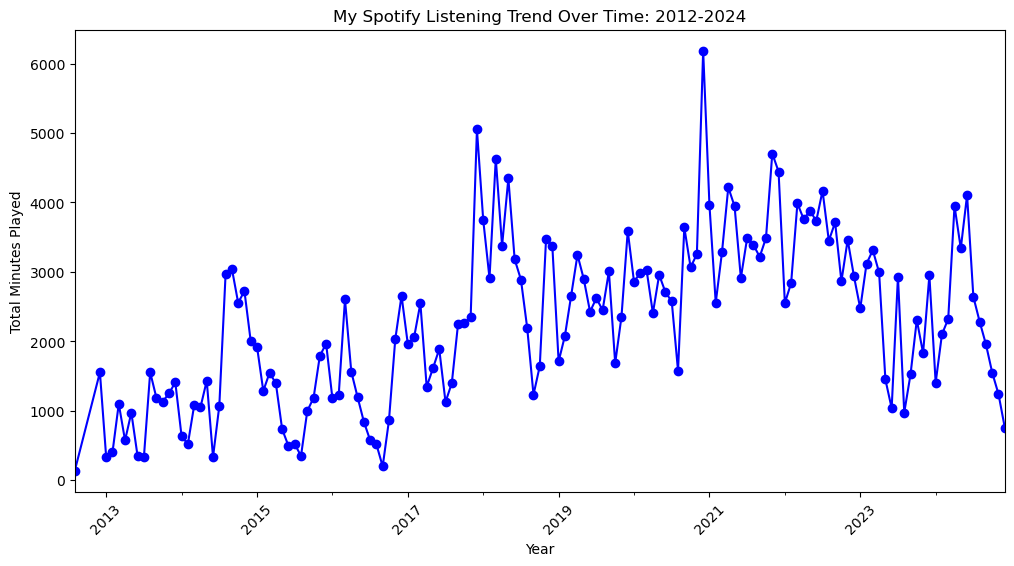

In [101]:
# Specify the month from the date/time column
spotify['year_month'] = spotify['ts'].dt.to_period('M')
# Use pandas.groupby() function to specify grouping by the new month column and minutes played, and sum them
listening_trend = spotify.groupby('year_month')['minutes_played'].sum()

# Size of the figure
plt.figure(figsize=(12, 6))
listening_trend.plot(kind='line', marker='o', color='blue') # Markers are months

# All graphs need all labels :
plt.xlabel("Year")
plt.ylabel("Total Minutes Played")
plt.title("My Spotify Listening Trend Over Time: 2012-2024")
plt.xticks(rotation=45) # Specify the angle of the x axis labels 

# Print the graph
plt.show()

In [133]:
# Continue to play with pandas.groupby() 

# Top artists by year
top_artists_by_year = spotify.groupby(['year', 'master_metadata_album_artist_name'])['minutes_played'].sum()
top_artists_by_year = top_artists_by_year.groupby('year').idxmax().apply(lambda x: x[1])
                    # Group the data by year and find the highest value using .idxmax() and extract just the artist name from the tuple.

print("")
print("Most Played Artists by Year:")
print(top_artists_by_year)

# Top songs by year
top_songs_by_year = spotify.groupby(['year', 'master_metadata_track_name'])['minutes_played'].sum()
top_songs_by_year = top_songs_by_year.groupby('year').idxmax().apply(lambda x: x[1])
                    # Group the data by year and find the highest value using .idxmax() and extract just the song name from the tuple.

print("")
print("Most Played Songs by Year:")
print(top_songs_by_year)


Most Played Artists by Year:
year
2012      Lana Del Rey
2013       Miley Cyrus
2014    Nashville Cast
2015            Hozier
2016    Meghan Trainor
2017       Miley Cyrus
2018       Marian Hill
2019     Ariana Grande
2020       Miley Cyrus
2021       Marian Hill
2022        Noah Cyrus
2023       Miley Cyrus
2024       Miley Cyrus
Freq: A-DEC, Name: minutes_played, dtype: object

Most Played Songs by Year:
year
2012                            Die Young
2013    Battle Scars (with Guy Sebastian)
2014                        Fade Into You
2015                            From Eden
2016                    Hopeless Romantic
2017                               Malibu
2018                   What Baking Can Do
2019                              7 rings
2020                                River
2021               When the Night is Over
2022                     I Burned LA Down
2023                              Flowers
2024                            Too Sweet
Freq: A-DEC, Name: minutes_played, dty

To create heatmaps: https://seaborn.pydata.org/generated/seaborn.heatmap.html

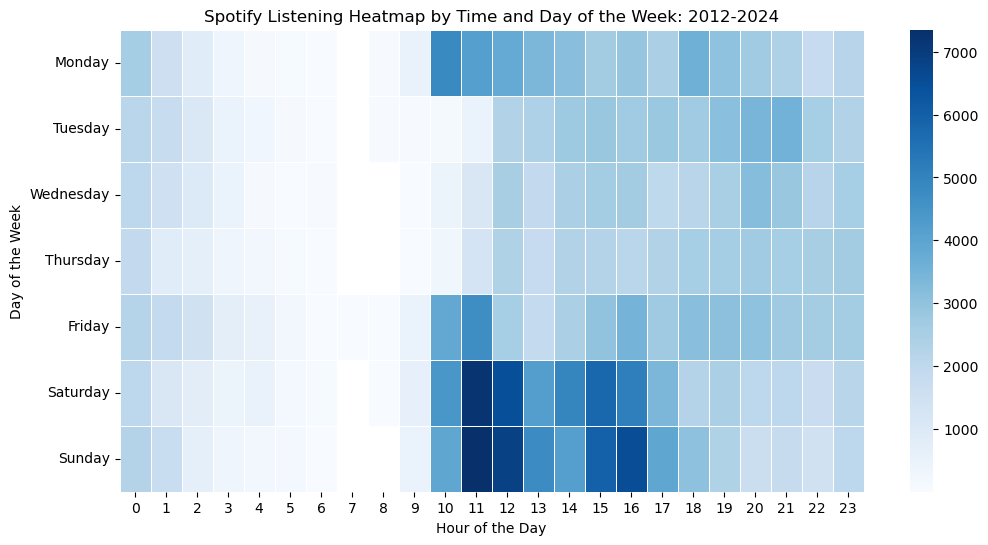

In [135]:
# Extract day of the week and hour
spotify['day_of_week'] = spotify['ts'].dt.day_name()
spotify['hour'] = spotify['ts'].dt.hour

# Aggregate minutes played by day and hour
heatmap_data = spotify.pivot_table(values='minutes_played', index='day_of_week', columns='hour', aggfunc='sum')

# Order the days of the week for proper display
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(day_order)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Spotify Listening Heatmap by Time and Day of the Week: 2012-2024")
plt.show()

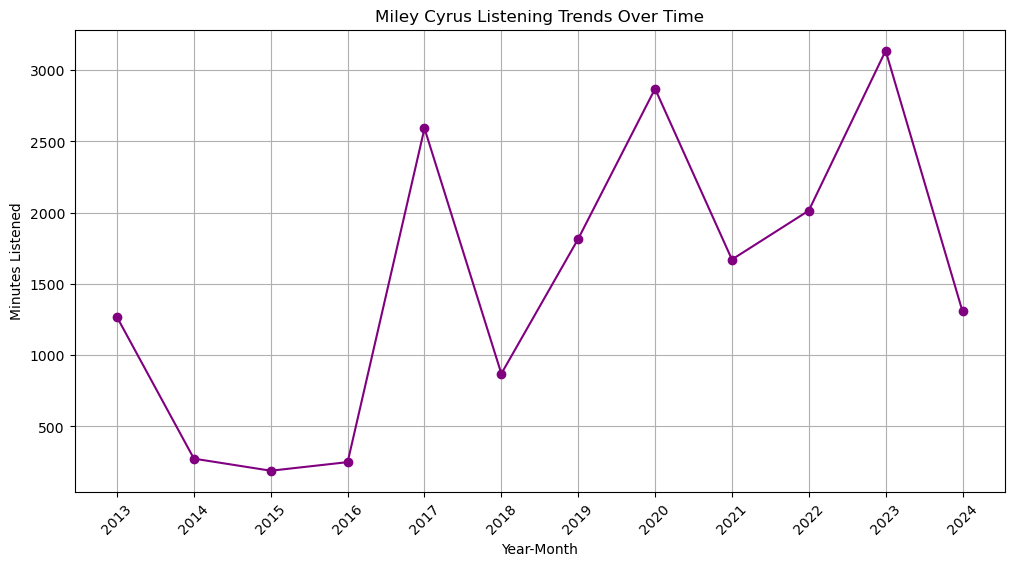

In [125]:
# Extract the year and month
spotify['year'] = spotify['ts'].dt.to_period('Y')

# Filter for Miley Cyrus
miley_df = spotify[spotify['master_metadata_album_artist_name'] == "Miley Cyrus"]

# Sum minutes listened per month
miley_trend = miley_df.groupby('year')['ms_played'].sum() / (1000 * 60)  # Convert ms to minutes

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(miley_trend.index.astype(str), miley_trend.values, marker='o', linestyle='-', color='purple')
plt.xlabel("Year-Month")
plt.ylabel("Minutes Listened")
plt.title("Miley Cyrus Listening Trends Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()